In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import operator
import math


In [69]:
def generateAllBoundaryPoints(points):
    # find the point with the lowest y-coordinate and the lowest x-coordinate
    border = []
    # print(points)
    starting_point = points[0]
    border.append(starting_point)
    current_point = points[0]
    next_point = points[1]
    i = 1
    while (next_point != starting_point):
        print("Staring from: ", current_point, "To: ", next_point)
        while( current_point != next_point):
            # print(current_point[0]==next_point[0], current_point[1]==next_point[1], current_point[0], next_point[0], current_point[1], next_point[1])
            if(current_point[0]==next_point[0]):
                if(current_point[1]<next_point[1]):
                    current_point = (current_point[0], current_point[1]+1)
                else:
                    current_point = (current_point[0], current_point[1]-1)
            elif(current_point[1]==next_point[1]):
                if(current_point[0]<next_point[0]):
                    current_point = (current_point[0]+1, current_point[1])
                else:
                    current_point = (current_point[0]-1, current_point[1])
            # print("Adding point: ", current_point)
            border.append(current_point)
        if(current_point == next_point):
            # print("Boundary break: ", next_point)
            i += 1
            if(i < len(points)):
                next_point = points[i]
            else:
                # mssing points bettween next_point and starting_point
                # print("mssing points bettween ",next_point ,"and", starting_point)
                if(next_point[0]==starting_point[0]):
                    if(next_point[1]<starting_point[1]):
                        next_point = (next_point[0], next_point[1]+1)
                    else:
                        next_point = (next_point[0], next_point[1]-1)
                elif (next_point[1]==starting_point[1]):
                    if(next_point[0]<starting_point[0]):
                        next_point = (next_point[0]+1, next_point[1])
                    else:
                        next_point = (next_point[0]-1, next_point[1])
                else:
                    next_point = starting_point
    return border

In [70]:
def verifyLineLength(x1, y1, points, bounrday, edge_x, edge_y):
    if not ( edge_x[0] <= x1 <= edge_x[1]) and ( edge_y[0] <= y1 <= edge_y[1]):
        return []
    if (x1, y1) not in bounrday:
        return []
    if (x1, y1) in bounrday and len(points) > 0:
        points.append((x1, y1))
    return points

def is_point_in_line(a, b, c):
    # if c == (7, 2):
    #     print(">>>>>>>>>>>>>>-----------<<<<<<<<<<<<<<<", c, "in line", a, b)
    if (a[0] == b[0] and c[0] == a[0]):
        if (a[1] <= c[1] <= b[1]):
            return True
        else:
            return False
    elif (a[1] == b[1] and c[1] == a[1]):
        if (a[0] <= c[0] <= b[0]):
            return True
        else:
            return False
    return False

def splitLinesOn(points, split_point):
    for index in range(len(points)):
        # check if the point is on the line of points[index] and points[index+1]
        if(index == len(points)-1):
            # print("Returned ", index, len(points)-1)
            break
        else:
            if is_point_in_line(points[index], points[index+1], split_point):
                # print("found split point", split_point," is on line", points[index], points[index+1])
                return points[index], points[index+1]
    # print("---------- need to check", points[-1], points[0])
    if is_point_in_line(points[-1], points[0], split_point):
        # print("found split point", split_point," is on line", points[-1], points[0])
        return points[-1], points[0]
    return False

def checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
    return ((x1, y1) not in bounrday ) and ( edge_x[0] <= x1 <= edge_x[1]) and ( edge_y[0] <= y1 <= edge_y[1])

def drawInnerLine(point, bounrday, edge=((0,10), (0,10)), flow="r", log=False):
    x = point[0]
    y = point[1]
    points = []
    edge_x = edge[0]
    edge_y = edge[1]
    if(flow == "r"):
        x1, y1 = x+1, y
        while checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
            points.append((x1, y1))
            x1, y1 = x1+1, y1
    elif(flow == "l"):
        x1, y1 = x-1, y
        while checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
            points.append((x1, y1))
            x1, y1 = x1-1, y1
    elif(flow == "u"):
        x1, y1 = x, y-1
        while checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
            points.append((x1, y1))
            x1, y1 = x1, y1-1
    elif(flow == "d"):
        x1, y1 = x, y+1
        while checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
            points.append((x1, y1))
            x1, y1 = x1, y1+1
    else:
        return []
    
    points = verifyLineLength(x1, y1, points, bounrday, edge_x, edge_y)
    allinBoundary = True
    for p in points:
        if p not in bounrday:
            # print(p, " is not in boundary")
            allinBoundary = False
            break
    if(allinBoundary):
        return []

    return points

In [74]:
def is_rectangle(points, log=False):
    if len(points) <4 :
        return False
    
    def isLeftTurn(a, b, c):
        if(a[1]==b[1]):
            if a[0]>b[0]:
                if b[1]<c[1]:
                    return True
                else:
                    return False
            else:
                if b[1]>c[1]:
                    return True
                else:
                    return False
        if a[0]==b[0]:
            if a[1]<b[1]:
                if b[0]<c[0]:
                    return True
                else:
                    return False
            else:
                if b[0]>c[0]:
                    return True
                else:
                    return False
    def isParallel(a, b, c):
        if a[0]==b[0] and b[0]==c[0]:
            return True
        elif a[1]==b[1] and b[1]==c[1]:
            return True
        return False

    def IsOrthogonal(a, b, c) :
        return (b[0] - a[0]) * (b[0] - c[0]) + (b[1] - a[1]) * (b[1] - c[1]) == 0
    not_reactangle = False

    should_be_left_turn = isLeftTurn(points[0], points[1], points[2])

    for index in range(len(points)-2):
        if log:
            print("checking", points[index], points[index+1], points[index+2] , IsOrthogonal(points[index], points[index+1], points[index+2]), "is orthogonal")
        if not IsOrthogonal(points[index], points[index+1], points[index+2]) :
            # if should_be_left_turn != isLeftTurn(points[index], points[index+1], points[index+2]):
                # if log:
            if isParallel(points[index], points[index+1], points[index+2]):
                if log:
                    print("is parallel")
            else:
                # print("-> should be left turn: ", should_be_left_turn, "is left turn: ", isLeftTurn(points[index], points[index+1], points[index+2]), " Box: ", points)
                not_reactangle = True
        # print("is left : ", should_be_left_turn, isLeftTurn(points[index], points[index+1], points[index+2]), (points[index], points[index+1], points[index+2]))
        if  should_be_left_turn != isLeftTurn(points[index], points[index+1], points[index+2]):
            # print("Blocked on ", points[index], points[index+1], points[index+2], "should be left turn: ", should_be_left_turn, "is left turn: ", isLeftTurn(points[index], points[index+1], points[index+2]), " Box: ", points)
            not_reactangle = True
    return not not_reactangle

def cutBoxes(points, cut_point, start_point, log=False):

    if start_point not in points:
        points.append(start_point)
        center = tuple(map(operator.truediv, reduce(lambda x, y: map(operator.add, x, y), points), [len(points)] * 2))
        points = sorted(points, key=lambda coord: (-135 - math.degrees(math.atan2(*tuple(map(operator.sub, coord, center))[::-1]))) % 360)


    first_box = [start_point, cut_point]
    second_box = [start_point, cut_point]
    new_point = False
    if cut_point not in points:
        if log:
            print("cut_point is not in points ", cut_point, points)
        # insert cut_point into points before start_point
        split_lines = splitLinesOn(points, cut_point)
        if split_lines == False:
            # print("split_lines == False", cut_point, start_point)
            # print("points ==> : ", points)
            return [], [], new_point
        if log:
            print("split_lines : ", split_lines, " is ->", cut_point)
        points.insert(points.index(split_lines[1]), cut_point)
        new_point = cut_point
        if log:
            print("new points : ", points)
   
    start_index = points.index(cut_point)+1
    start_index = start_index%len(points)
    # generating first box
    if log:
        print("start from ", start_index, "value: ", points[start_index])
        print("Break point :", start_point, "on points", points)
    
    i = start_index
    while points[i] != start_point:
        first_box.append(points[i])
        i += 1
        i = i%len(points)
    if log:
        print("first_box: ", first_box)
    
    # generating second box
    i = start_index
    reverse_points = points[::-1]
    if log:
        print("reverse_points: ", reverse_points)
    start_index = reverse_points.index(cut_point)+1
    start_index = start_index%len(reverse_points)
    if log:
        print("start from ", start_index, "value: ", reverse_points[start_index])
    i = start_index

    while reverse_points[i] != start_point:
        second_box.append(reverse_points[i])
        i += 1
        i = i%len(reverse_points)
    if log:
        print("second_box: ", second_box)

    return first_box, second_box, new_point

def removePoints(points, box):
    cut_start = False
    new_points = []
    for p in points:
        if p in box and not cut_start:
            cut_start = True
        if p not in box and cut_start:
            cut_start = False
        if not cut_start:
            new_points.append(p)
    return new_points

def generateBoxes(cutPoint, p, final_box, dynamic_points, log=False):
    # cut_line = [p, cutPoint[-1]]
    new_point = False
    box1, box2, new_point = cutBoxes(dynamic_points, cutPoint, p, log)
    box1_rectangle = is_rectangle(box1)
    box2_rectangle = is_rectangle(box2)
    if not box1_rectangle and not box2_rectangle:
        if log:
            print("box1 : ", box1, " box2 : ", box2)
        return final_box, dynamic_points, False, new_point
    if box1_rectangle:
        final_box.append(box1)
        dynamic_points = removePoints(dynamic_points, box1)
    if box2_rectangle:
        final_box.append(box2)
        if log:
            print("box2 is ", box2_rectangle)
        dynamic_points = removePoints(dynamic_points, box2)
    if log:
        print("box1 : ", box1, " box2 : ", box2)
        print("dynamic_points : ", dynamic_points)
    return final_box, dynamic_points, True, new_point

# points = [(2,0), (6,0), (6,2), (8,2), (8,5), (7,5), (7,7), (5,7), (5,9), (3,9), (3,7), (0,7), (0,2), (2,2) ]
points = [(7,5), (7,7), (5,7), (5,9), (3,9), (3,7), (0,7), (0,2), (2,2), (2,0), (6,0), (6,2), (8,2), (8,5)]
# points = [(5, 7), (5, 9), (3, 9), (3, 7), (0, 7), (0, 5), (7, 5), (7, 7)]
points = [(2, 7), (3, 7), (5, 7), (7, 7), (8, 5), (7, 5), (8, 2), (6, 2)]

bounrday = generateAllBoundaryPoints(points)
edge_x = (0, 9)
edge_y = (0, 9)
edge = (edge_x, edge_y)

final_box = []
dynamic_points = points

for p in points:
    if len(dynamic_points) == 0:
        break
    print("checking points : ", p)
    rightCutPoint = drawInnerLine(p, bounrday, edge, flow="r")
    leftCutPoint = drawInnerLine(p, bounrday, edge, flow="l")
    topCutPoint = drawInnerLine(p, bounrday, edge, flow="u")
    bottomCutPoint = drawInnerLine(p, bounrday, edge, flow="d")


    if (rightCutPoint == [] and leftCutPoint == [] and topCutPoint == [] and bottomCutPoint == []):
        # print("\n\nfrom point : ", p, " on right cut point : ", rightCutPoint, " on left cut point : ", leftCutPoint, " on top cut point : ", topCutPoint, " on bottom cut point : ", bottomCutPoint)
        continue
    else:
        pass
        # print("\n\nfrom point : ", p, " on right cut point : ", rightCutPoint, " on left cut point : ", leftCutPoint, " on top cut point : ", topCutPoint, " on bottom cut point : ", bottomCutPoint)
        
    new_point = False
    if rightCutPoint != []:
        print("rightCutPoint : ", rightCutPoint)
        final_box, dynamic_points, smooth, new_point = generateBoxes(rightCutPoint[-1], p, final_box, dynamic_points)
        if smooth == False:
            continue
    if leftCutPoint != []:
        print("leftCutPoint : ", leftCutPoint)
        final_box, dynamic_points, smooth, new_point = generateBoxes(leftCutPoint[-1], p, final_box, dynamic_points)
        if smooth == False:
            continue

    if topCutPoint != []:
        print("topCutPoint : ", topCutPoint)
        final_box, dynamic_points, smooth, new_point = generateBoxes(topCutPoint[-1], p, final_box, dynamic_points)
        if smooth == False:
            continue
    if bottomCutPoint != []:
        print("bottomCutPoint : ", bottomCutPoint)
        final_box, dynamic_points, smooth, new_point = generateBoxes(bottomCutPoint[-1], p, final_box, dynamic_points)
        if smooth == False:
            continue
    if new_point is not False:
        points.append(new_point)
        dynamic_points.append(new_point)

    # dynamic_points = [(7, 7), (7, 5), (0, 7), (0, 5)]
    center = tuple(map(operator.truediv, reduce(lambda x, y: map(operator.add, x, y), dynamic_points), [len(dynamic_points)] * 2))
    dynamic_points = sorted(dynamic_points, key=lambda coord: (-135 - math.degrees(math.atan2(*tuple(map(operator.sub, coord, center))[::-1]))) % 360)
    # print("from point : ", p, " on right cut point : ", rightCutPoint, " on left cut point : ", leftCutPoint, " on top cut point : ", topCutPoint, " on bottom cut point : ", bottomCutPoint)
    # break
    
if is_rectangle(dynamic_points):
    final_box.append(dynamic_points)
    dynamic_points = []
print(final_box)

points :  [(2, 7), (3, 7), (5, 7), (7, 7), (8, 5), (7, 5), (8, 2), (6, 2)]
Staring from:  (2, 7) To:  (3, 7)
Staring from:  (3, 7) To:  (5, 7)
Staring from:  (5, 7) To:  (7, 7)
Staring from:  (7, 7) To:  (8, 5)


KeyboardInterrupt: 

In [72]:
final_box, dynamic_points

([[(5, 7), (3, 7), (3, 9), (5, 9)],
  [(2, 2), (6, 2), (6, 0), (2, 0)],
  [(2, 2), (2, 7), (0, 7), (0, 2)]],
 [(2, 7), (3, 7), (5, 7), (7, 7), (8, 5), (7, 5), (8, 2), (6, 2)])

<Figure size 432x288 with 0 Axes>

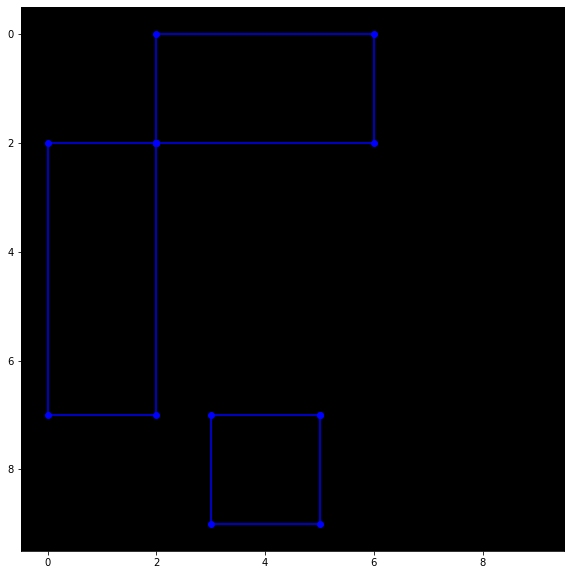

In [66]:
img = np.zeros((10,10,3), np.uint8)

plt.clf()

fig = plt.figure(figsize=(10, 10))

for box in final_box:
    x_values = []
    y_values = []
    for i in range(len(box)):
        x_values.append(box[i][0])
        y_values.append(box[i][1])
    x_values.append(box[0][0])
    y_values.append(box[0][1])
    # x_values = [box[0][0], box[1][0], box[2][0], box[3][0], box[0][0]]
    # y_values = [box[0][1], box[1][1], box[2][1], box[3][1], box[0][1]]
    plt.plot(x_values, y_values, color="b", marker="o", linestyle="-")

plt.imshow(img)

In [67]:
dynamic_points

[(2, 7), (3, 7), (5, 7), (7, 7), (8, 5), (7, 5), (8, 2), (6, 2)]

In [115]:
points = [(2, 7), (3, 7), (5, 7), (7, 7), (8, 5), (7, 5), (8, 2), (6, 2)]


# def isParallel(a, b, c):
#     if a[0]==b[0] and b[0]==c[0]:
#         return True
#     elif a[1]==b[1] and b[1]==c[1]:
#         return True
#     return False

def IsOrthogonal(a, b, c) :
    return (b[0] - a[0]) * (b[0] - c[0]) + (b[1] - a[1]) * (b[1] - c[1]) == 0

def sortPoints(points):
    new_points = []
    i = 0
    holds = []
    new_points.append(points[i])
    for i in range(1, len(points)):
        if points[i-1][0] == points[i][0] or points[i-1][1] == points[i][1]:
            new_points.append(points[i])
        else:
            holds.append(points[i])
    for h in holds:
        for i in range(1, len(new_points)):
            print(new_points[i-1], h, new_points[i], IsOrthogonal(new_points[i-1], h, new_points[i]))
    print("----< ", holds, new_points)

sortPoints(points)

(2, 7) (8, 5) (3, 7) False
(3, 7) (8, 5) (5, 7) False
(5, 7) (8, 5) (7, 7) False
(7, 7) (8, 5) (7, 5) False
(7, 5) (8, 5) (6, 2) False
(2, 7) (8, 2) (3, 7) False
(3, 7) (8, 2) (5, 7) False
(5, 7) (8, 2) (7, 7) False
(7, 7) (8, 2) (7, 5) False
(7, 5) (8, 2) (6, 2) False
----<  [(8, 5), (8, 2)] [(2, 7), (3, 7), (5, 7), (7, 7), (7, 5), (6, 2)]


In [113]:
points

[(2, 7), (3, 7), (5, 7), (7, 7), (8, 5), (7, 5), (8, 2), (6, 2)]